In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from threading import Timer
from timeit import default_timer as timer
from IPython.display import clear_output

In [3]:
start = timer()
prep_dataset1 = pd.read_csv('../datasets/dataset_test_02_07.csv', delimiter=",")

df = prep_dataset1.iloc[:,1:4]


In [4]:
WINDOW = 35

for i in np.arange(df.shape[0]):    
    init = i*WINDOW
    init2 = (i+1)*WINDOW
    if(init2<df.shape[0]):
        df.iloc[init:init+WINDOW,2] =  df.iloc[init2,2]


In [5]:

df

,temperature,label,delay
0,19.3024,1,126.251634
1,19.1652,1,126.251634
2,19175.0000,1,126.251634
3,19.1456,1,126.251634
4,19.1652,1,126.251634
...,...,...,...
4895,19.5768,0,420.416429
4896,19.5866,0,420.416429
4897,19567.0000,0,420.416429
4898,19.5572,0,420.416429


In [6]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [7]:
test

,temperature,label,delay
3920,17.5678,0,1121.053927
3921,17.5776,0,1121.053927
3922,17.5776,0,1121.053927
3923,17.5776,0,1121.053927
3924,17.5776,0,1121.053927
...,...,...,...
4895,19.5768,0,420.416429
4896,19.5866,0,420.416429
4897,19567.0000,0,420.416429
4898,19.5572,0,420.416429


In [8]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []    
    for i in range(len(X) - time_steps):
        clear_output(wait=True)
        print('modeling to keras ',round((i/(len(X) - time_steps))*100,2), ('%'), end='')
        s = round(timer() - start)
        if(s>60):
            s /=60
            print(' ', s, ' seconds')
        v = X.iloc[i: (i+time_steps), 1:3].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [9]:
def LSTMconf(X_train):
    print('Init config LSTM')
    model = keras.Sequential()
    model.add(
        keras.layers.Bidirectional(
            keras.layers.LSTM(
                 activation="relu",
                units=512,
                input_shape=(X_train.shape[1],X_train.shape[2])
            )
        ))
    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dense(units=512, activation="relu"))
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    
    loss ="mse"
    optim = tf.keras.optimizers.Adam(
    learning_rate=0.0001)
    metrics=["accuracy"]

    model.compile(loss=loss, optimizer=optim, 
#              metrics=metrics
             )
    return model
    

In [10]:
def LSTMfit(model,X_train,Y_train):
    print('Init Train')
    start = timer()
    history = model.fit(
        X_train, Y_train, 
        epochs=256, 
        batch_size= 128,
        validation_split=0.1,
        shuffle=False,
    #     callbacks=[tensorboard_callback]
    )
    return history


In [11]:

X_train,Y_train = create_dataset(train, train.delay)
model = LSTMconf(X_train)
history = LSTMfit(model,X_train, Y_train)


modeling to keras  99.97 %Init config LSTM
Init Train
Epoch 1/256
28/28 [==============================] - 4s 44ms/step - loss: 23580694.0000 - val_loss: 9614.7529
Epoch 2/256
28/28 [==============================] - 1s 34ms/step - loss: 6965773.0000 - val_loss: 303.1277
Epoch 3/256
28/28 [==============================] - 1s 34ms/step - loss: 1603336.7500 - val_loss: 1159.5415
Epoch 4/256
28/28 [==============================] - 1s 35ms/step - loss: 1644059.8750 - val_loss: 59.9213
Epoch 5/256
28/28 [==============================] - 1s 36ms/step - loss: 1019111.7500 - val_loss: 660.5020
Epoch 6/256
28/28 [==============================] - 1s 33ms/step - loss: 1056305.0000 - val_loss: 325.2736
Epoch 7/256
28/28 [==============================] - 1s 34ms/step - loss: 872764.6250 - val_loss: 577.0607
Epoch 8/256
28/28 [==============================] - 1s 33ms/step - loss: 987129.8750 - val_loss: 376.4670
Epoch 9/256
28/28 [==============================] - 1s 37ms/step - loss: 845973.3

Epoch 77/256
28/28 [==============================] - 1s 39ms/step - loss: 96693.1094 - val_loss: 16.8015
Epoch 78/256
28/28 [==============================] - 1s 44ms/step - loss: 93579.9375 - val_loss: 16.2675
Epoch 79/256
28/28 [==============================] - 1s 43ms/step - loss: 94839.0625 - val_loss: 13.5714
Epoch 80/256
28/28 [==============================] - 1s 39ms/step - loss: 94291.8984 - val_loss: 15.0583
Epoch 81/256
28/28 [==============================] - 1s 40ms/step - loss: 91998.6094 - val_loss: 13.4555
Epoch 82/256
28/28 [==============================] - 1s 39ms/step - loss: 94250.9062 - val_loss: 13.1619
Epoch 83/256
28/28 [==============================] - 1s 43ms/step - loss: 96961.9609 - val_loss: 14.4442
Epoch 84/256
28/28 [==============================] - 1s 39ms/step - loss: 89533.7109 - val_loss: 16.2748
Epoch 85/256
28/28 [==============================] - 1s 38ms/step - loss: 93524.8125 - val_loss: 14.0969
Epoch 86/256
28/28 [==========================

Epoch 154/256
28/28 [==============================] - 1s 39ms/step - loss: 80619.7969 - val_loss: 24.3559
Epoch 155/256
28/28 [==============================] - 1s 38ms/step - loss: 79339.3984 - val_loss: 19.0222
Epoch 156/256
28/28 [==============================] - 1s 38ms/step - loss: 84381.9062 - val_loss: 15.4627
Epoch 157/256
28/28 [==============================] - 1s 38ms/step - loss: 79848.3438 - val_loss: 17.0824
Epoch 158/256
28/28 [==============================] - 1s 37ms/step - loss: 83232.1641 - val_loss: 23.5751
Epoch 159/256
28/28 [==============================] - 1s 37ms/step - loss: 76082.5156 - val_loss: 13.6845
Epoch 160/256
28/28 [==============================] - 1s 37ms/step - loss: 80424.0781 - val_loss: 19.5485
Epoch 161/256
28/28 [==============================] - 1s 41ms/step - loss: 81365.7422 - val_loss: 13.8571
Epoch 162/256
28/28 [==============================] - 1s 38ms/step - loss: 79180.1797 - val_loss: 25.0591
Epoch 163/256
28/28 [================

28/28 [==============================] - 1s 37ms/step - loss: 79480.7578 - val_loss: 23.5657
Epoch 231/256
28/28 [==============================] - 1s 37ms/step - loss: 104422.5859 - val_loss: 15.2777
Epoch 232/256
28/28 [==============================] - 1s 37ms/step - loss: 108723.5078 - val_loss: 16.9367
Epoch 233/256
28/28 [==============================] - 1s 38ms/step - loss: 104203.0938 - val_loss: 51.9594
Epoch 234/256
28/28 [==============================] - 1s 38ms/step - loss: 121560.9922 - val_loss: 20.9612
Epoch 235/256
28/28 [==============================] - 1s 37ms/step - loss: 123394.5859 - val_loss: 39.9099
Epoch 236/256
28/28 [==============================] - 1s 37ms/step - loss: 125767.1875 - val_loss: 28.0209
Epoch 237/256
28/28 [==============================] - 1s 38ms/step - loss: 104267.4375 - val_loss: 100.7088
Epoch 238/256
28/28 [==============================] - 1s 41ms/step - loss: 78520.3672 - val_loss: 18.8748
Epoch 239/256
28/28 [======================

In [12]:
print('Saving Model')
model.save('models/lstm_mininet')

Saving Model
INFO:tensorflow:Assets written to: models/lstm_mininet\assets


# loss training

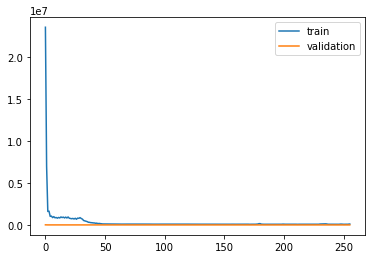

In [13]:

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend();

In [14]:
X_test,Y_test = create_dataset(test, test.delay)

modeling to keras  99.9 %  5.0  seconds


In [15]:
Y_test

array([1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705

# predicting

In [16]:
y_pred = model.predict(X_test)

# unormalizing

In [17]:
y_pred

array([[1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [1016.9655 ],
       [ 130.88924],
       [ 130.88924],
       [ 130.88924],
       [ 130.88924],
       [ 130.88924],
       [ 130.88924],
       [ 130.88924],
       [ 130.88924],
       [ 130.88924],
       [ 130.88924],
       [ 130.88924],
       [ 130.88924],
       [ 130.

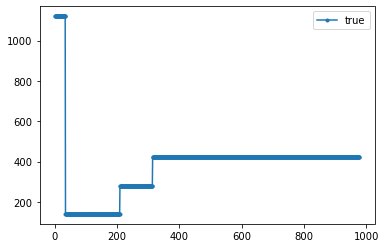

In [18]:
fig2 = plt.figure()
a2 = fig2.add_subplot(1,1,1)
a2.plot(Y_test, marker='.', label='true')
a2.legend();

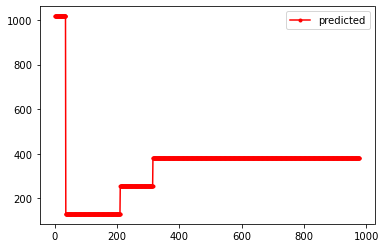

In [19]:
fig3 = plt.figure()
a3 = fig3.add_subplot(1,1,1)
a3.plot(y_pred,'r',marker='.', label='predicted')
a3.legend();

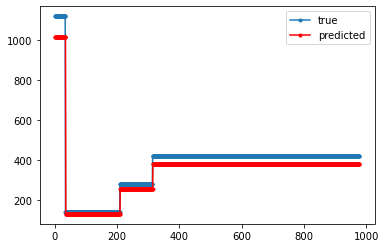

In [20]:
fig4 = plt.figure()
a4 = fig4.add_subplot(1,1,1)

a4.plot(Y_test, marker='.', label='true')
a4.plot(y_pred,'r',marker='.', label='predicted')
a4.legend();

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score

In [22]:
size = np.min([y_pred.shape[0],Y_test.shape[0] ])
rmse =  mean_squared_error(Y_test[0:size], y_pred[0:size], squared=False)
mae =  mean_absolute_error(Y_test[0:size], y_pred[0:size])
median_mae = median_absolute_error(Y_test[0:size], y_pred[0:size])
evs = explained_variance_score(Y_test[0:size], y_pred[0:size])

print(rmse)
print(mae)
print(median_mae)
print('Explained Variance Score: ',evs)

47.19385572683618
34.2348709951504
37.05803060531616
Explained Variance Score:  0.9627473022338792


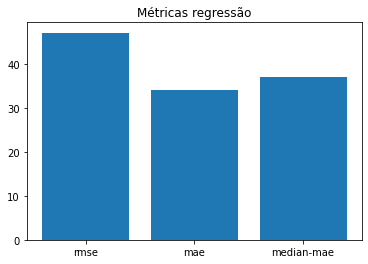

In [23]:
objects = ('rmse', 'mae', 'median-mae')
y_pos = np.arange(3)
performance = [rmse,mae,median_mae]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('Métricas regressão')

plt.show()

In [24]:
Y_test[0:size]

array([1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718, 1121.05392718, 1121.05392718,
       1121.05392718, 1121.05392718,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705254,
        140.13705254,  140.13705254,  140.13705254,  140.13705